In [1]:
# import libraries
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import nltk
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from collections import Counter
sns.set()

[nltk_data] Downloading package stopwords to /Users/ru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ru/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ru/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [2]:
import os
os.path.exists("20th_century_scrape.txt")

True

In [3]:
from nltk.corpus import stopwords # import stopwords also necessary - not only download (differnt than in task)

stop_words = set(stopwords.words('english'))

In [4]:

os.getcwd()

'/Users/ru/20th_century'

In [5]:
# Import txt file

with open('20th_century_scrape.txt', 'r', errors='ignore') as file: 
   data = file.read().replace( '\n', ' ')

In [6]:
nltk.download("punkt_tab") # missing element according to chat gpt

[nltk_data] Downloading package punkt_tab to /Users/ru/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
# Word tokenization

from nltk.tokenize import word_tokenize
tokenized_word = word_tokenize(data)
print(tokenized_word) 

['From', 'Wikipedia', ',', 'the', 'free', 'encyclopedia', 'The', '20th', 'century', 'changed', 'the', 'world', 'in', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'between', 'countries', 'and', 'led', 'to', 'the', 'creation', 'of', 'atomic', 'bombs', ',', 'the', 'Cold', 'War', 'led', 'to', 'the', 'Space', 'Race', 'and', 'the', 'creation', 'of', 'space-based', 'rockets', ',', 'and', 'the', 'World', 'Wide', 'Web', 'was', 'created', '.', 'These', 'advancements', 'have', 'played', 'a', 'significant', 'role', 'in', 'citizens', "'", 'lives', 'and', 'shaped', 'the', '21st', 'century', 'into', 'what', 'it', 'is', 'today', '.', 'Historic', 'events', 'in', 'the', '20th', 'century', '[', 'edit', ']', 'World', 'at', 'the', 'beginning', 'of', 'the', 'century', '[', 'edit', ']', 'Main', 'article', ':', 'Edwardian', 'era', 'The', 'new', 'beginning', 'of', 'the', '20th', 'century', 'marked', 'significant', 'changes', '.', 'The', '1900s', 'saw', 'the', 'decade', 'herald', 

In [8]:
print("Type:", type(tokenized_word))
print("Length:", len(tokenized_word))

Type: <class 'list'>
Length: 21755


In [9]:
from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)

In [10]:
print("Unique:", len(dist_words))
print("Done")

Unique: 4713
Done


from nltk.probability import FreqDist
dist_words = FreqDist(tokenized_word)
print(dist_words) 

In [11]:
dist_words.most_common(10)

[('.', 1626),
 ('the', 1117),
 (',', 976),
 ('of', 612),
 ('and', 407),
 ('to', 325),
 ('The', 319),
 ('[', 309),
 (']', 309),
 ('in', 298)]

ATTENTION:  Frequency Distribution Plot # proposed code did not work

plt.figure(figsize=(8, 3))
dist_words.plt(10,cumulative = False)
plt.show()

<Axes: xlabel='Samples', ylabel='Counts'>

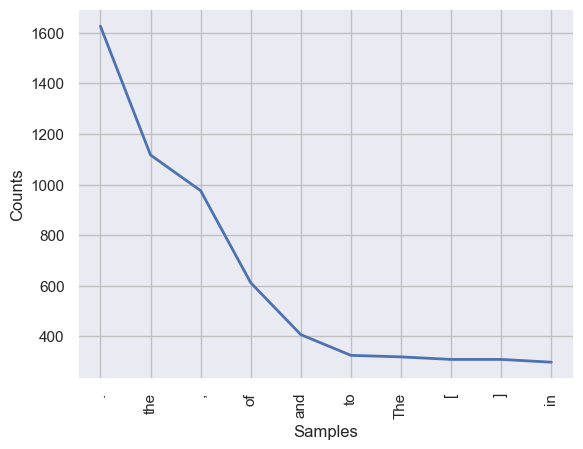

In [12]:
# ALTERNATIVE: Frequency Distribution Plot
# reccomendet by chatgpt
dist_words.plot(10, cumulative=False) 

In [13]:
# ATTENTION: import stopwords also necessary, not only download
from nltk.corpus import stopwords 

stop_words = set(stopwords.words('english'))


In [14]:
# removing stopwords in words
filtered_words = []   # create empty list in a corrected version by chat gpt

for word in tokenized_word:
    if word not in stop_words:
        filtered_words.append(word)

In [15]:
# problems with frozen kernel: following 4 lines strategies proposed by chatgpt
print("Type:", type(filtered_words))

Type: <class 'list'>


In [16]:
try:
    print("Length:", len(filtered_words))
except:
    print("Length: cannot determine")

Length: 17039


In [17]:
print("Sample:", str(filtered_words)[:200])

Sample: ['From', 'Wikipedia', ',', 'free', 'encyclopedia', 'The', '20th', 'century', 'changed', 'world', 'unprecedented', 'ways', '.', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creati


In [18]:
# Create a new FreqDist for filtered–words
print("start")
dist_words_filter = FreqDist(filtered_words)
print("done")

start
done


In [19]:
print (dist_words_filter)

<FreqDist with 4609 samples and 17039 outcomes>


<Axes: xlabel='Samples', ylabel='Counts'>

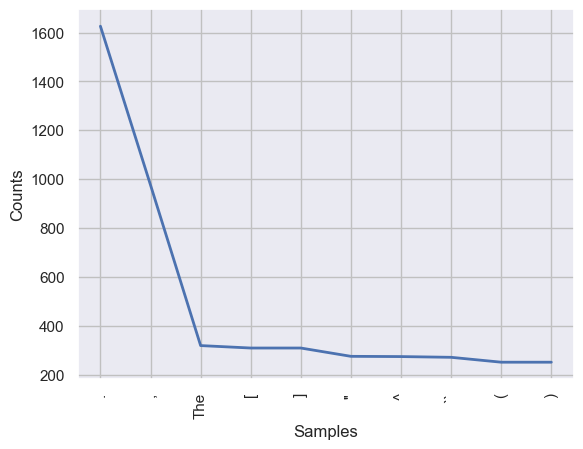

In [20]:
dist_words_filter.plot(10, cumulative=False)

In [21]:
# Substitute all punctuation marks with a space

sans_punc = re.sub("[^a-zA-Z]",  # Search for all non-letters
                        " ",        # Replace all non-letters with spaces
                        str(filtered_words))

In [22]:
# Word tokenization

tokenized_word_2 = word_tokenize(sans_punc)




In [23]:
print (tokenized_word_2)

['From', 'Wikipedia', 'free', 'encyclopedia', 'The', 'th', 'century', 'changed', 'world', 'unprecedented', 'ways', 'The', 'World', 'Wars', 'sparked', 'tension', 'countries', 'led', 'creation', 'atomic', 'bombs', 'Cold', 'War', 'led', 'Space', 'Race', 'creation', 'space', 'based', 'rockets', 'World', 'Wide', 'Web', 'created', 'These', 'advancements', 'played', 'significant', 'role', 'citizens', 'lives', 'shaped', 'st', 'century', 'today', 'Historic', 'events', 'th', 'century', 'edit', 'World', 'beginning', 'century', 'edit', 'Main', 'article', 'Edwardian', 'era', 'The', 'new', 'beginning', 'th', 'century', 'marked', 'significant', 'changes', 'The', 's', 'saw', 'decade', 'herald', 'series', 'inventions', 'including', 'automobile', 'airplane', 'radio', 'broadcasting', 'saw', 'completion', 'Panama', 'Canal', 'The', 'Scramble', 'Africa', 'continued', 's', 'resulted', 'wars', 'genocide', 'across', 'continent', 'The', 'atrocities', 'Congo', 'Free', 'State', 'shocked', 'civilized', 'world', 'F

In [24]:
# Create a new FreqDist

dist_words_filter_2 = FreqDist(tokenized_word_2) 

<Axes: xlabel='Samples', ylabel='Counts'>

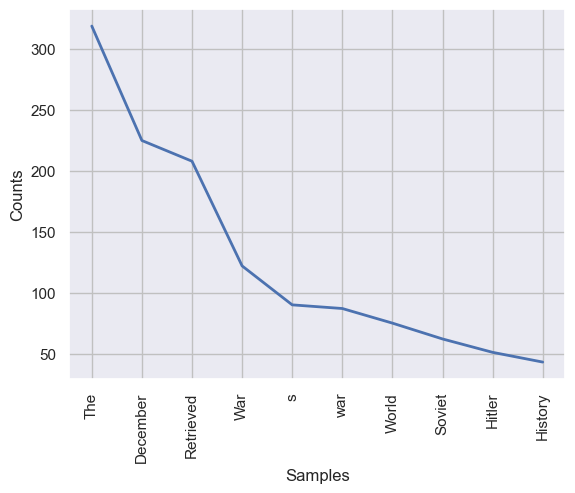

In [25]:
dist_words_filter_2.plot(10, cumulative=False)

# Comment: 
the frequency of the words "december" and "retrieved" is striking. Upon reviewing the text, it is noticeable that they originate primarily from the source references (when a specific link was checked). In this respect, they are not meaningful for the content of the actual text and should probably be filtered out in the next step. Same for the word "the" which is not meaningful either and "s" which is not a word.

In [26]:
# filter out new stopwords
new_stopwords = ["December", "Retrieved", 's', 'The']

filtered = []
for word in tokenized_word_2:
     if word not in new_stopwords:
        filtered.append(word)

In [27]:

%%time
text = TextBlob(str(filtered))



CPU times: user 2.73 ms, sys: 199 μs, total: 2.93 ms
Wall time: 2.93 ms


In [28]:
# necessary to run according to chat gpt - not in task
!python -m textblob.download_corpora  

[nltk_data] Downloading package brown to /Users/ru/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/ru/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/ru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/ru/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to /Users/ru/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ru/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finished.


In [29]:
tags_list = text.tags


In [30]:
tags_list

[('[', 'NN'),
 ("'Wikipedia", 'NNP'),
 ("'", 'POS'),
 ("'encyclopedia", 'NNP'),
 ("'", 'POS'),
 ("'th", 'NNP'),
 ("'", 'POS'),
 ("'century", 'NNP'),
 ("'", 'POS'),
 ("'changed", 'VBD'),
 ("'world", 'NNP'),
 ("'", 'POS'),
 ("'unprecedented", 'VBD'),
 ("'ways", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wars", 'NNS'),
 ("'", 'POS'),
 ("'sparked", 'VBD'),
 ("'tension", 'NNP'),
 ("'", 'POS'),
 ("'countries", 'NNS'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'creation", 'NNP'),
 ("'", 'POS'),
 ("'atomic", 'NNP'),
 ("'", 'POS'),
 ("'War", 'NNP'),
 ("'", 'POS'),
 ("'led", 'VBD'),
 ("'Space", 'NNP'),
 ("'", 'POS'),
 ("'Race", 'NNP'),
 ("'", 'POS'),
 ("'creation", 'NN'),
 ("'space", 'NNP'),
 ("'", 'POS'),
 ("'based", 'VBD'),
 ("'rockets", 'NNS'),
 ("'", 'POS'),
 ("'World", 'NNP'),
 ("'", 'POS'),
 ("'Wide", 'NNP'),
 ("'", 'POS'),
 ("'Web", 'NNP'),
 ("'", 'POS'),
 ("'created", 'VBD'),
 ("'These", 'JJ'),
 ("'advancements", 'NNS'),
 ("'", 'POS'),
 ("'significant", 'NNP'),
 ("'", 'POS')

In [31]:
# frequrncy of wordtypes
df_text = pd.DataFrame(tags_list)
df_text.columns = [ 'Words', "Word type"]
df_t=df_text.groupby('Word type').count().reset_index()
top10=df_t.nlargest(10, 'Words')

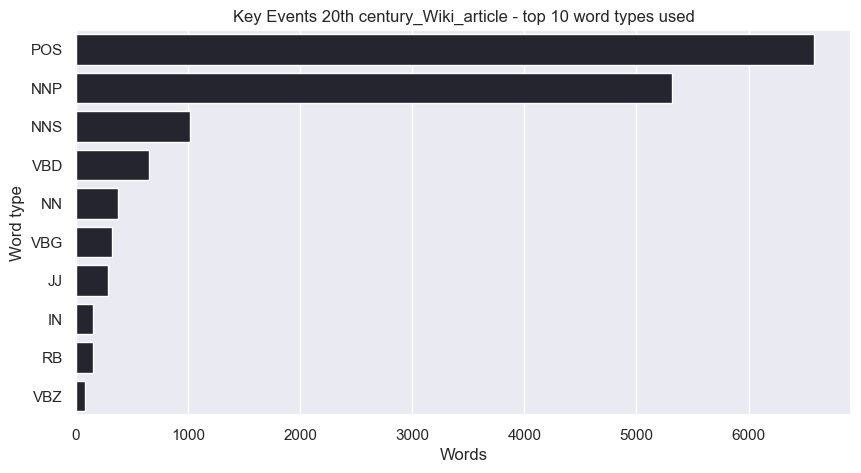

In [32]:
plt.figure(figsize = (10, 5))
with sns.dark_palette("xkcd:blue", 20):
      sns.barplot(x = "Words", y = "Word type",
     saturation = 0.9, data = top10).set_title("Key Events 20th century_Wiki_article - top 10 word types used")

In [33]:
# frequency of top 15 nouns
df = df_text[(df_text['Word type'] == "NN") | (df_text['Word type'] == "NNS") | (df_text['Word type'] == "NNS")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_nouns = y.nlargest(10, 'Occurrences') 

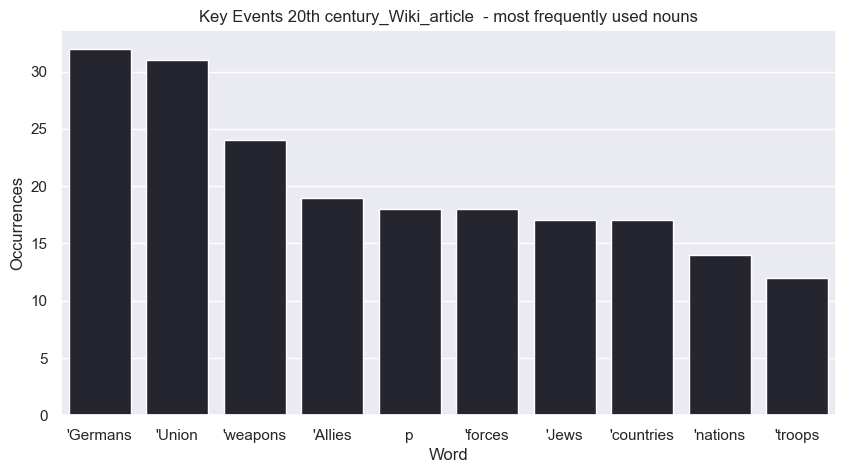

In [34]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x = "Word", y="Occurrences",
      saturation=0.9, data = top15_nouns).set_title("Key Events 20th century_Wiki_article  - most frequently used nouns")

In [35]:
# frequency of top 15 verbs
df = df_text[(df_text['Word type'] == "VBD") | (df_text['Word type'] == "VBZ") | (df_text['Word type'] == "VBG")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_verbs = y.nlargest(10, 'Occurrences') 

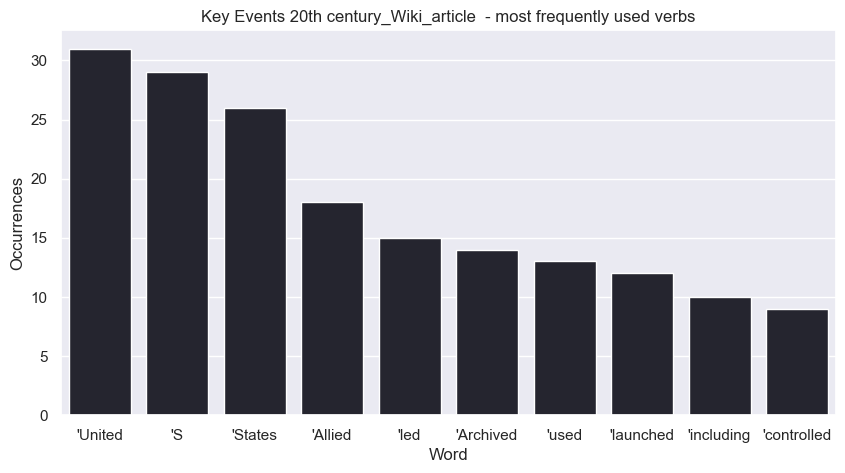

In [36]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x = "Word", y="Occurrences",
      saturation=0.9, data = top15_verbs).set_title("Key Events 20th century_Wiki_article  - most frequently used verbs")

In [37]:
# frequency of top 15 adjectives
df = df_text[(df_text['Word type'] == "JJ")]
df.columns = ["Word", "Occurrences"]
x = df.groupby('Word').count().reset_index()
y = x.sort_values(by = ['Occurrences'], ascending=False)
top15_adjectives = y.nlargest(10, 'Occurrences') 

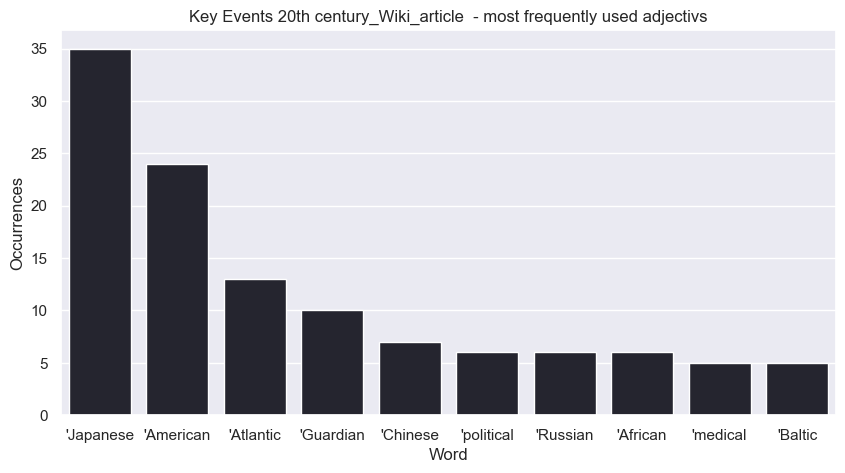

In [38]:
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
      sns.barplot(x = "Word", y="Occurrences",
      saturation=0.9, data = top15_adjectives).set_title("Key Events 20th century_Wiki_article  - most frequently used adjectivs")

# count countrynames from list in text
(method from chatgpt - which includes vcombined countrnames)

In [39]:
# after several trials with wrong outcome this was the the working code:
# most of the relevant libararies are allready imported

import string

In [40]:
# read CSV in the right way, attention with index number in table

countries_df = pd.read_csv("countries_list_20th_century_1.5.csv", header=None, names=['index', 'country_name'])




In [41]:
# remove empty spaces
countries_df['country_name'] = countries_df['country_name'].str.strip()

In [42]:
# improve maching (empty spaces, datatype, create list)
countries_list = countries_df['country_name'].dropna().astype(str).tolist()


In [43]:
# check if correct
print(countries_list[:10])

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria']


In [44]:
# improve maching (lower cases)
countries_lower = [c.lower() for c in countries_list]

In [45]:
# read Text with the right encoding

with open("20th_century_scrape.txt", "r", encoding="utf-8") as f:
    file_content = f.read()

# check if correct
print(file_content[:500])  # Zeige die ersten 500 Zeichen

# normalize Text: lowercase, remove punctuation
text_lower = file_content.lower()
text_lower = text_lower.translate(str.maketrans('', '', string.punctuation))

# count Countries

country_counts = Counter()
for country, country_lower in zip(countries_list, countries_lower):
    country_pattern = country_lower.translate(str.maketrans('', '', string.punctuation))
    count = len(re.findall(r'\b' + re.escape(country_pattern) + r'\b', text_lower))
    if count > 0:
        country_counts[country] = count

# create Dataframe

df_country_counts = pd.DataFrame(country_counts.items(), columns=['Country', 'Count'])
df_country_counts = df_country_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

df_country_counts


From Wikipedia, the free encyclopedia
The 20th century changed the world in unprecedented ways. The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created. These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.
Historic events in the 20th century[edit]
World at the beginning of the century[ed


,Country,Count
0,Germany,35
1,Japan,30
2,United States,21
3,France,14
4,Poland,13
...,...,...
57,Lebanon,1
58,Algeria,1
59,Laos,1
60,Kenya,1


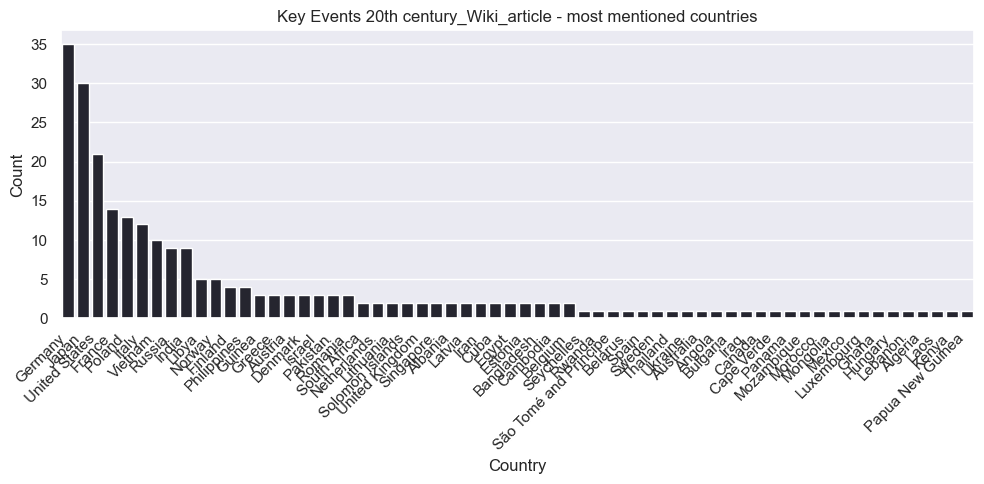

In [46]:
# plot diagramm
plt.figure(figsize=(10, 5))
with sns.dark_palette("xkcd:blue", 10):
    sns.barplot(x="Country", y="Count", saturation=0.9, data=df_country_counts)\
       .set_title("Key Events 20th century_Wiki_article - most mentioned countries")
plt.xticks(rotation=45, ha='right')  # Labels drehen, damit sie lesbar sind
plt.tight_layout()  # Layout anpassen, damit nix abgeschnitten wird
plt.show()

COMMENT:
There are several things to see: 
a) The very low frequency of the United Kingdom is not plausible in the historic context. It is quite likely that United Kingdom is refered to as Britain or British in the text. 
Tt is necessary to double check these models with backround as well as with language conventions.
c) Abbreviations like GDR or UDSSR does not seem to be part of the countries list - but that might be important in  this historic context.
b) the perspective of the article seems to be quite western centric with a huge focus on the Second World War while topics like Colonization and Decolonization ar not as much in the center.

# second method 
(as in task)

In [47]:
dict_of_counts = dist_words_filter_2 # the filtered list of all word of the text

In [48]:
dict_of_counts = {k.lower(): v for k, v in dist_words_filter_2.items()}

# Filter for countries
dict_of_counts_filtered = {country: dict_of_counts[country.lower()] 
                           for country in countries_list 
                           if country.lower() in dict_of_counts}

# Create DataFrame 
df_country_counts = pd.DataFrame(list(dict_of_counts_filtered.items()), columns=['Country', 'Count'])
df_country_counts = df_country_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

In [49]:
df_country_counts

,Country,Count
0,Germany,41
1,Japan,33
2,France,17
3,Italy,14
4,Poland,13
5,Vietnam,13
6,India,9
7,Russia,9
8,Norway,5
9,Philippines,5


In this result I dont have combined names like 'United States' or 'South Africa' therefore the other method seems to work better in this context.

# sentiment analysis

In [50]:
# tokenize sentences
from nltk.tokenize import sent_tokenize
tokenized_sent = sent_tokenize(data)
print(tokenized_sent) 

['From Wikipedia, the free encyclopedia The 20th century changed the world in unprecedented ways.', 'The World Wars sparked tension between countries and led to the creation of atomic bombs, the Cold War led to the Space Race and the creation of space-based rockets, and the World Wide Web was created.', "These advancements have played a significant role in citizens' lives and shaped the 21st century into what it is today.", 'Historic events in the 20th century[edit] World at the beginning of the century[edit] Main article: Edwardian era The new beginning of the 20th century marked significant changes.', 'The 1900s saw the decade herald a series of inventions, including the automobile, airplane and radio broadcasting.', '1914 saw the completion of the Panama Canal.', 'The Scramble for Africa continued in the 1900s and resulted in wars and genocide across the continent.', 'The atrocities in the Congo Free State shocked the civilized world.', 'From 1914 to 1918, the First World War, and i

EXPECTATION: I would assume that the text is rather neutral (not positive, not negativ) with a score around 0 and has little subjectivity - also a score close to 0

In [51]:
# sentiment analysis
text_sent = TextBlob(str(filtered))
print(text_sent.sentiment)

Sentiment(polarity=0.04996406161178882, subjectivity=0.3533427045737647)


In [ ]:
COMMENT: I am bit astonished about the the relatively high subjectivity score, I would have assumend something lower to 0 without knowing how a text close to 0 would sound.